Project 2
Thiago Viegas & Diego Rosenberg

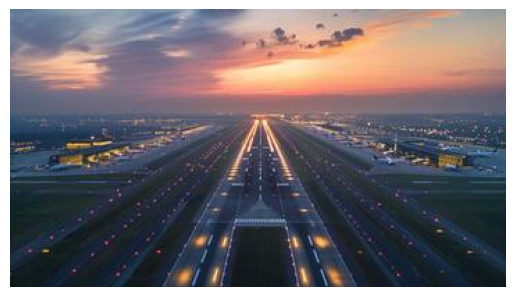

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('question1/runaway.jpeg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

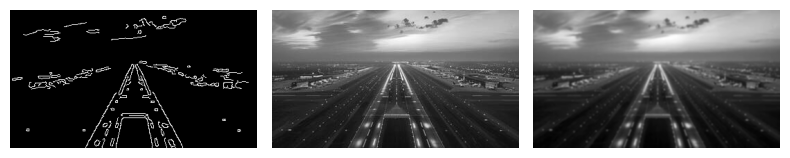

In [2]:
#Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel_size = (5,5)

sigmaX_low = 2
sigmaX_high = 5

sigmaY_low = 2
sigmaY_high = 5

#Apply Gaussian blur
image_blur = cv2.GaussianBlur(image_gray, kernel_size, 0)

#Perform Canny edge detection
edges = cv2.Canny(image_blur, 75, 150)

fig, axes = plt.subplots(1, 3, figsize=(8, 8))
axes[0].imshow(edges, cmap='gray')
axes[0].axis('off')

axes[1].imshow(image_gray, cmap='gray')
axes[1].axis('off')

axes[2].imshow(image_blur, cmap='gray')
axes[2].axis('off')

plt.tight_layout()
plt.show()


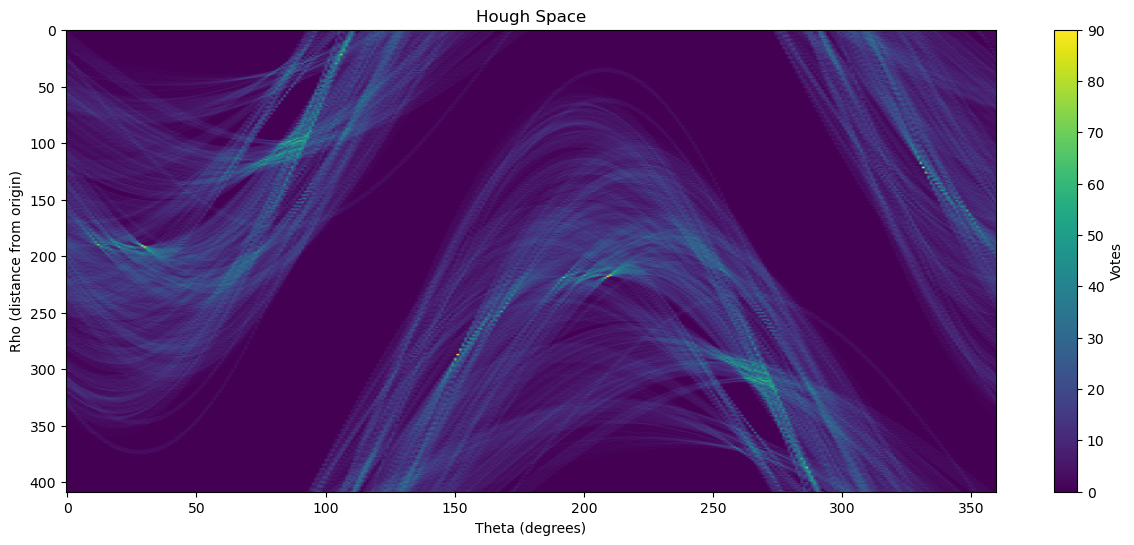

In [3]:
#will do Hough Transform to detect lines in the image
hough_space = np.zeros((int(np.sqrt(edges.shape[0]**2 + edges.shape[1]**2)), 360), dtype=np.uint64)

#create theta values
thetas = np.deg2rad(np.arange(0, 360))

#Get coordinates of edge points
edge_points = np.argwhere(edges)

#Vote in Hough space
for y, x in edge_points:
    for theta_idx in range(len(thetas)):
        theta = thetas[theta_idx]
        rho = int(x * np.cos(theta) + y * np.sin(theta))
        hough_space[rho, theta_idx] += 1


plt.figure(figsize=(15, 6))
plt.imshow(hough_space, cmap='viridis', aspect='auto')
plt.title('Hough Space')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (distance from origin)')
plt.colorbar(label='Votes')
plt.show()

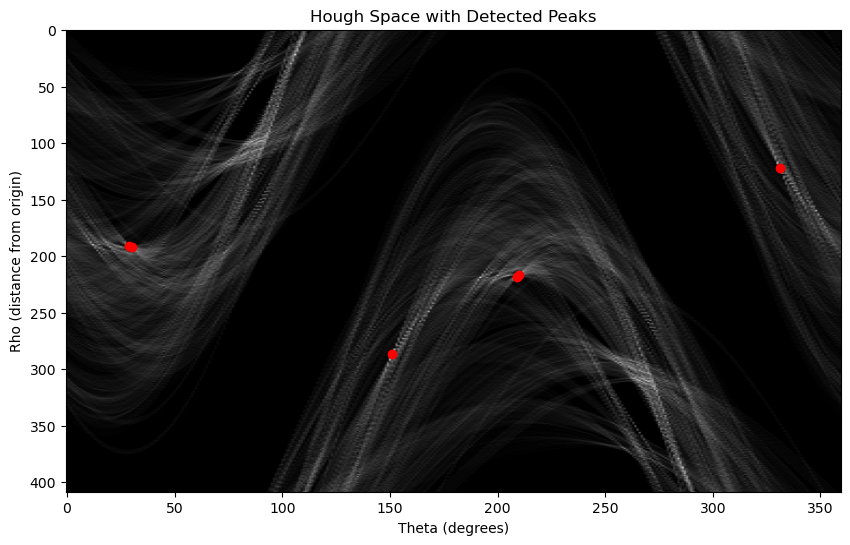

In [4]:
threshold = 75
peaks = np.argwhere(hough_space > threshold)


plt.figure(figsize=(10, 6))
plt.imshow(hough_space, cmap='gray', aspect='auto')
plt.scatter(peaks[:, 1], peaks[:, 0], color='red')
plt.title('Hough Space with Detected Peaks')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (distance from origin)')
plt.show()

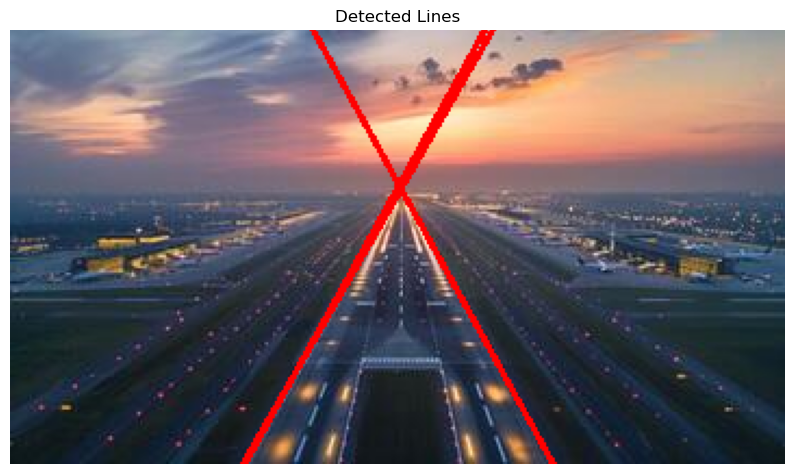

In [5]:
output_image = image.copy()

for rho, theta_idx in peaks:
    theta = thetas[theta_idx]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Lines')
plt.show()

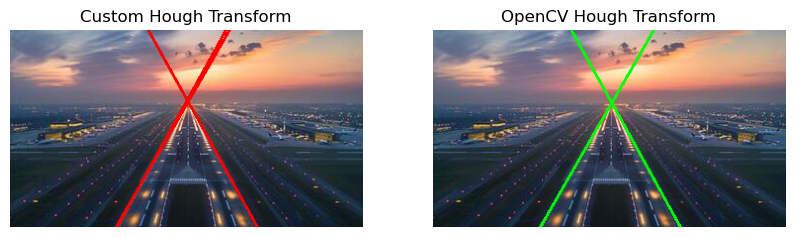

In [6]:
#Will try cv2 builtin Hough Transform for comparison
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)
output_image_builtin = image.copy()

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(output_image_builtin, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Custom Hough Transform')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image_builtin, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('OpenCV Hough Transform')
plt.show()



Question 1 - Part B

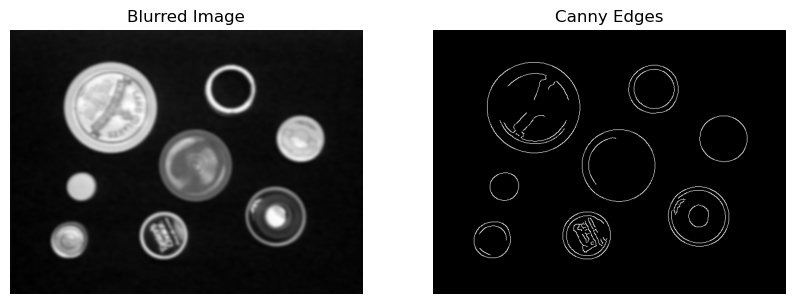

In [33]:
coins1 = cv2.imread('question1/circles1.gif', cv2.IMREAD_GRAYSCALE)

#images are already gray scaled so no need to convert
blurred_coins1 = cv2.GaussianBlur(coins1, (13,13), 0)

edges = cv2.Canny(blurred_coins1, 100, 150)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_coins1, cmap='gray')
plt.axis('off')
plt.title('Blurred Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Canny Edges')
plt.show()


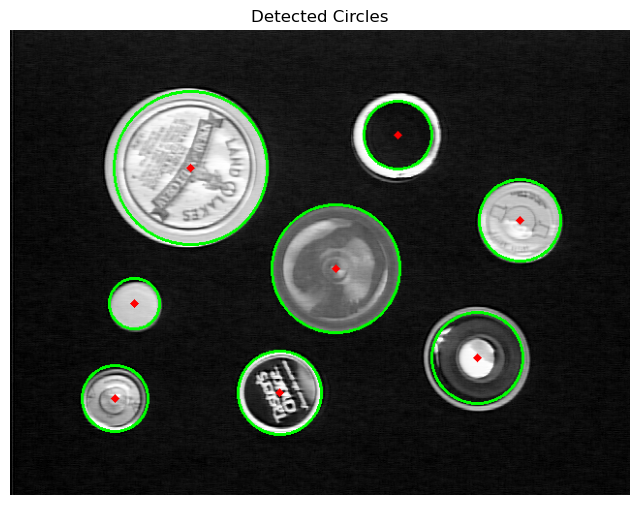

In [45]:
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=25, param1=100, param2=28, minRadius=15, maxRadius=80)

if circles is not None:
    circles = np.uint16(np.around(circles))
    output_image_circles = cv2.cvtColor(coins1, cv2.COLOR_GRAY2BGR)

    for i in circles[0, :]:
        cv2.circle(output_image_circles, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output_image_circles, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(output_image_circles, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected Circles')
    plt.show()
else:
    print("No circles were detected.")

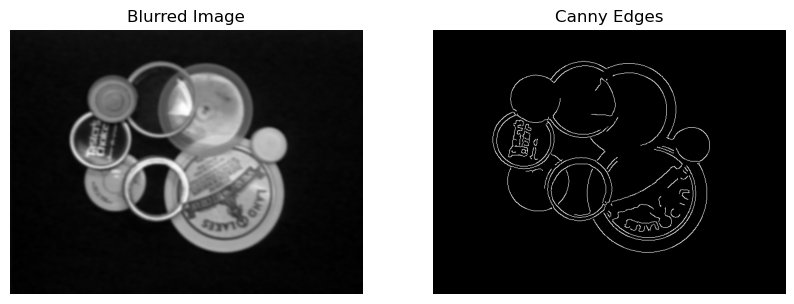

In [74]:
coins2 = cv2.imread('question1/circles2.gif', cv2.IMREAD_GRAYSCALE)

blurred_coins2 = cv2.GaussianBlur(coins2, (11,11), 0)
edges2 = cv2.Canny(blurred_coins2, 100, 150)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_coins2, cmap='gray')
plt.axis('off')
plt.title('Blurred Image')
plt.subplot(1, 2, 2)
plt.imshow(edges2, cmap='gray')
plt.axis('off')
plt.title('Canny Edges')
plt.show()

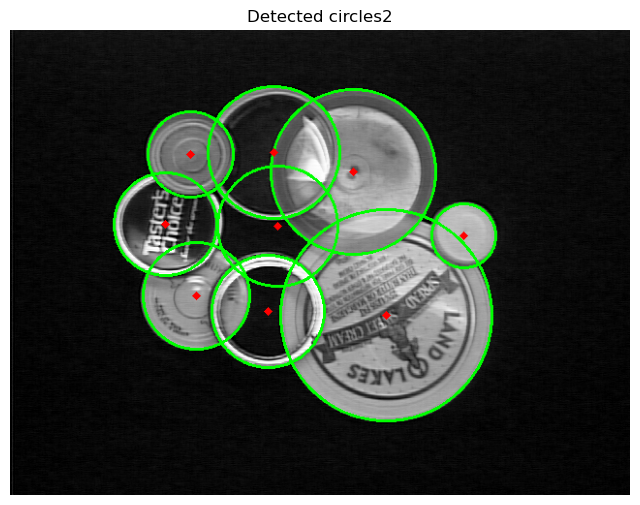

In [92]:
circles2 = cv2.HoughCircles(edges2, cv2.HOUGH_GRADIENT, dp=1, minDist=75, param1=65, param2=28, minRadius=25, maxRadius=130)

if circles2 is not None:
    circles2 = np.uint16(np.around(circles2))
    output_image_circles2 = cv2.cvtColor(coins2, cv2.COLOR_GRAY2BGR)

    for i in circles2[0, :]:
        cv2.circle(output_image_circles2, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output_image_circles2, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(output_image_circles2, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected circles2')
    plt.show()
else:
    print("No circles2 were detected.")

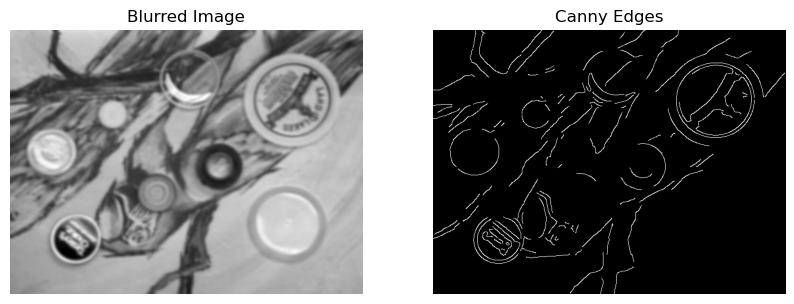

In [96]:
coins3 = cv2.imread('question1/circles3.gif', cv2.IMREAD_GRAYSCALE)
blurred_coins3 = cv2.GaussianBlur(coins3, (11,11), 0)
edges3 = cv2.Canny(blurred_coins3, 100, 150)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_coins3, cmap='gray')
plt.axis('off')
plt.title('Blurred Image')
plt.subplot(1, 2, 2)
plt.imshow(edges3, cmap='gray')
plt.axis('off')
plt.title('Canny Edges')
plt.show()